In [38]:
#I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at 
#least one affair?) and trying to predict the classification for each woman. 

#Dataset 
#The dataset I chose is the affairs dataset that comes with Statsmodels. 
#It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about 
#their participation in extramarital affairs. More information about the study is available in a 1978 paper 
#from the Journal of Political Economy. 

#Description of Variables 
#The dataset contains 6366 observations of 9 variables: 
#rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good) 
#age: woman's age 
#yrs_married: number of years married 
#children: number of children 
#religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious) 
#educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 
#17 = some graduate school, 20 = advanced degree) 
#occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 
#3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional
#with advanced degree) 
#occupation_husb: husband's occupation (same coding as above) 
#affairs: time spent in extra-marital affairs 

#Import and load data 
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#Load Data
data = sm.datasets.fair.load_pandas().data

In [39]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [40]:
# add "affair" column: 1 represents having affairs, 0 represents not 
data['affair'] = (data.affairs > 0).astype(int)

In [41]:
# Explore Data
#Here We can see that on average, women who have affairs rate their marriages lower, which is to be expected.
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [42]:
#Explore Data. Continue..
# Rate Marriage : 1 is poor and 5 is good. Here we can see the if marriage rate is lowere there is more affair.
# And An increase in age, yrs_married, and number of children appears to correlate with a declining marriage rating.
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


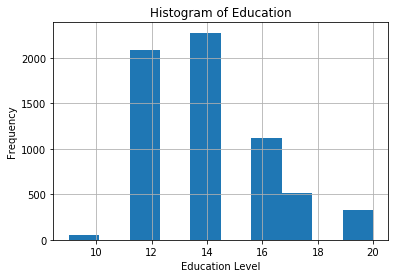

In [43]:
#Data Visualization
# histogram of education
data.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

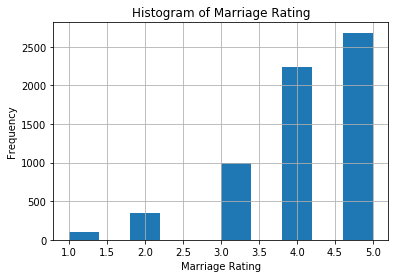

In [44]:
#Data Visualization
# histogram of marriage rating
data.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')
plt.show()

In [45]:
#Data Visualization
#Take a look at the distribution of marriage ratings for those having affairs versus those not having affairs.
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, data.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')
plt.show()

NameError: name 'dta' is not defined

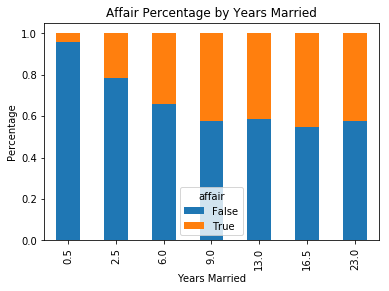

In [46]:
#Data Visualization
#Use a stacked barplot to look at the percentage of Women having affairs by number of years of marriage.
affair_yrs_married = pd.crosstab(data.yrs_married, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')
plt.show()

In [47]:
#Prepare Data for Logistic Regression
#To prepare the data, I want to add an intercept column as well as dummy variables for occupation 
#and occupation_husb, since I'm treating them as categorial variables. 
#The dmatrices function from the patsy module can do that using formula language


y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', data, return_type="dataframe") 
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [48]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2', 
                        'C(occupation)[T.3.0]':'occ_3', 
                        'C(occupation)[T.4.0]':'occ_4', 
                        'C(occupation)[T.5.0]':'occ_5', 
                        'C(occupation)[T.6.0]':'occ_6', 
                        'C(occupation_husb)[T.2.0]':'occ_husb_2', 
                        'C(occupation_husb)[T.3.0]':'occ_husb_3', 
                        'C(occupation_husb)[T.4.0]':'occ_husb_4', 
                        'C(occupation_husb)[T.5.0]':'occ_husb_5', 
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [49]:
#We also need to flatten y into a 1-D array, so that scikit-learn will properly understand it as the response variable.
# flatten y into a 1-D array
y = np.ravel(y) 
#Print Target Variable Affair
y

array([1., 1., 1., ..., 0., 0., 0.])

In [50]:
#Independant Variables
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [51]:
#Logistic Regression
#Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7258875274897895

In [52]:
#73% accuracy in the model.
#Predict the affair and add to the dataframe
data['Predict_Affair']=model.predict(X)
data.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,Predict_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,1.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,0.0
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1,0.0
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1,1.0
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1,0.0
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1,0.0
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1,1.0


In [53]:
# what percentage had affairs?
y.mean()

0.3224945020420987

In [54]:
#Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". 
#So we're doing better than the null error rate, but not by much.
#Let's examine the coefficients to see what we learn
# examine the coefficients
X.columns, np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'), array([[ 1.48983589],
        [ 0.18806639],
        [ 0.49894787],
        [ 0.25066856],
        [ 0.83900806],
        [ 0.83390843],
        [ 0.19063594],
        [ 0.29783271],
        [ 0.16140885],
        [ 0.18777091],
        [ 0.19401637],
        [-0.70312336],
        [-0.05841777],
        [ 0.10567654],
        [ 0.01691927],
        [-0.37113627],
        [ 0.0040165 ]]))

In [55]:
#Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. 
#For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to 
#the baseline occupation (student), since all of the dummy coefficients are positive.

#Model Evaluation Using a Validation Set
#So far, we have trained and tested on the same set. Let's instead split the data into a training set 
#and a testing set.

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
#We now need to predict class labels for the test set. 
#We will also generate the class probabilities, just to take a look.
# predict class labels for the test set
predicted = model2.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [57]:
# generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[0.3514634 , 0.6485366 ],
       [0.90955084, 0.09044916],
       [0.72567333, 0.27432667],
       ...,
       [0.55727385, 0.44272615],
       [0.81207043, 0.18792957],
       [0.74734601, 0.25265399]])

In [58]:
#As you can see, the classifier is predicting a 1 (having an affair) any time the probability in 
#the second column is greater than 0.5. Now let's generate some evaluation metrics.
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

#The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

0.7298429319371728
0.745950606950631


In [59]:
#The confusion matrix and a classification report with other metrics.
print(metrics.confusion_matrix(y_test, predicted))
print(' ')
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]
 
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [60]:
#Model Evaluation Using Cross-Validation
#Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print('Class Validation Scores :',scores)
print(' ')
print('Mean Class Validation Scores :',scores.mean())
print(' ')
print('The Model looks good and  performing at 73% accuracy')

Class Validation Scores : [0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
 
Mean Class Validation Scores : 0.7241630685514876
 
The Model looks good and  performing at 73% accuracy


In [61]:
#Now Model is ready and we can predict by passing appropriate Indipendant variables.
#Predicting the Probability of an Affair

#Predict the probability of an affair for a random woman not present in the dataset. 
#She's a 25-year-old teacher who graduated college, has been married for 3 years, 
#has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

print('rate_marriage : Fair',3)  #12th Field
print('womans age :',25) #13th Field
print('yrs_married :',3) #14th Field
print('number of children  :',1)#15th Field
print('religious  :',4) #16tg Field
print('Women Education  :',16) #17th Field
print('Women Occupation  :',4) #4th Field
print('Women Occupation  :',2) #7th Field
print(' ')
predict_affair=model2.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,16]]))
print('Probabality of not having an affair ',predict_affair[0,0])
print('Probabality of having an affair ',predict_affair[0,1])

rate_marriage : Fair 3
womans age : 25
yrs_married : 3
number of children  : 1
religious  : 4
Women Education  : 16
Women Occupation  : 4
Women Occupation  : 2
 
Probabality of not having an affair  0.7730147818075149
Probabality of having an affair  0.2269852181924851
